In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from grouper import group_by_volume, group_by_time
from pyfolio.timeseries import perf_stats
from functools import partial
from utils import chart_price, plot, v_backtester, c_backtester, perf, perf_var, breakout_strategy, bootstrap, m_proc
import sys
sys.path.append('/home/tomek/ib_tools')
from indicators import get_ATR, get_signals
import matplotlib.pyplot as plt
from typing import NamedTuple
from collections import namedtuple
%matplotlib inline

In [2]:
from datastore_pytables import Store

In [3]:
store = Store()
store.keys()

['/cont/min/CL_20191120_NYMEX_USD',
 '/cont/min/ES_20191220_GLOBEX_USD',
 '/cont/min/GC_20191227_NYMEX_USD',
 '/cont/min/GE_20191216_GLOBEX_USD',
 '/cont/min/NKD_20191212_GLOBEX_USD',
 '/cont/min/NQ_20191220_GLOBEX_USD',
 '/cont/min/YM_20191220_ECBOT_USD',
 '/cont/min/ZB_20191219_ECBOT_USD',
 '/cont/min/ZF_20191231_ECBOT_USD',
 '/cont/min/ZN_20191219_ECBOT_USD']

In [4]:
contract = store.read('/cont/min/NQ_20191220_GLOBEX_USD').sort_index()

In [5]:
b = breakout_strategy(contract, 
                  time_int = 23,
                  periods = [5, 10, 20, 40,], # 80, 160,],
                  ema_fast = 10,
                  ema_slow = 120,
                  atr_periods = 80,
                  sl_atr = 1,
                  start = '20180701', 
                  end = '20181231', 
                  )

Annual return                  0.417556
Cumulative returns             0.193913
Annual volatility              0.119974
Sharpe ratio                    2.96975
Calmar ratio                    6.91755
Stability                      0.811663
Max drawdown                 -0.0603618
Omega ratio                     1.69353
Sortino ratio                    5.2444
Skew                            0.42557
Kurtosis                        1.33441
Tail ratio                      1.33765
Daily value at risk          -0.0137014
Win percent                    0.453608
Average gain                    34.8087
Average loss                   -20.2217
Avg gain/loss ratio             1.72135
Position EV                     4.74055
Positions per day               2.27344
Days per position              0.439863
Actual avg. duration    0 days 04:43:00
Days                                128
Positions                           291
Trades                              582
Monthly EV                      226.324


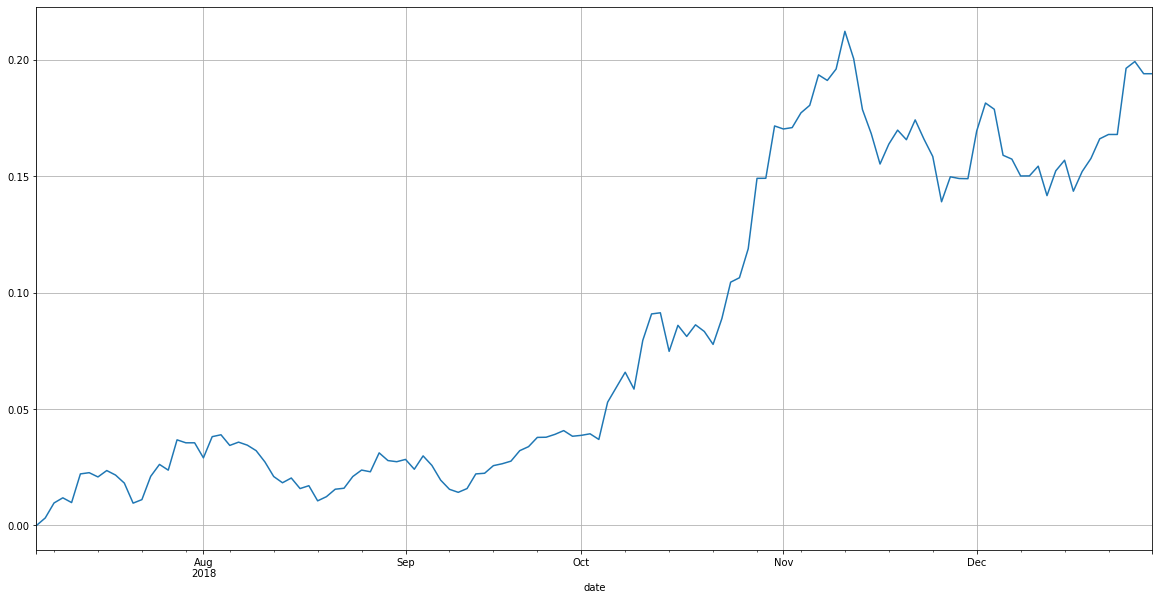

In [6]:
results = perf(b)